<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Requirements" data-toc-modified-id="Requirements-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Requirements</a></span></li><li><span><a href="#Introduction" data-toc-modified-id="Introduction-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Dataset" data-toc-modified-id="Dataset-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Dataset</a></span><ul class="toc-item"><li><span><a href="#Dataset-description" data-toc-modified-id="Dataset-description-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Dataset description</a></span></li><li><span><a href="#Source-dataset" data-toc-modified-id="Source-dataset-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Source dataset</a></span></li><li><span><a href="#Get-multipolygon-of-US-states-and-territories-for-filtering" data-toc-modified-id="Get-multipolygon-of-US-states-and-territories-for-filtering-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Get multipolygon of US states and territories for filtering</a></span></li><li><span><a href="#Tidy-dataset-and-extract-new-features" data-toc-modified-id="Tidy-dataset-and-extract-new-features-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Tidy dataset and extract new features</a></span><ul class="toc-item"><li><span><a data-toc-modified-id="landfall-distribution-of-tidy-dataset-3.4.1"><span class="toc-item-num">3.4.1&nbsp;&nbsp;</span>landfall distribution of tidy dataset</a></span></li></ul></li><li><span><a href="#let's-display-the-US-landfall-hurricanes-in-table-format" data-toc-modified-id="let's-display-the-US-landfall-hurricanes-in-table-format-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>let's display the US landfall hurricanes in table format</a></span></li></ul></li><li><span><a href="#Analysis-of-hurricanes-that-made-US-landfall" data-toc-modified-id="Analysis-of-hurricanes-that-made-US-landfall-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Analysis of hurricanes that made US landfall</a></span><ul class="toc-item"><li><span><a href="#Visualize-storm-tracks-on-map" data-toc-modified-id="Visualize-storm-tracks-on-map-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Visualize storm tracks on map</a></span></li><li><span><a href="#Histogram" data-toc-modified-id="Histogram-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Histogram</a></span></li></ul></li></ul></div>

* **FA17-BL-INFO-I590-14120**
* **Data Visualization**
* **Gerald Manipon, MS Data Science student - Indiana University**
* **gmanipon@iu.edu**
* **this jupyter notebook can be found here: https://github.com/pymonger/tropicalstorm-data-visualization**

# Requirements

1. Install anaconda3 (https://www.continuum.io/downloads)
1. Install GEOS Framework (http://www.kyngchaos.com/software:frameworks). On Mac, install using http://www.kyngchaos.com/files/software/frameworks/GEOS_Framework-3.6.1-1.dmg.
1. Install requisite packages:
   ```
   conda install netCDF4
   conda install -c conda-forge ipyleaflet
   conda install -c conda-forge geopandas
   conda install -c conda-forge gdal
   conda install -c conda-forge libgdal
   conda install -c conda-forge krb5
   pip install -U ipyleaflet
   conda install -c conda-forge jupyter_contrib_nbextensions
   ```
1. Add the following line to your .bash_profile and source it:
   ```
   export GDAL_DATA=$(gdal-config --datadir)
   ```
1. Download source dataset to directory containing this notebook file:
   ```
   wget ftp://eclipse.ncdc.noaa.gov/pub/ibtracs/v03r10/wmo/netcdf/Allstorms.ibtracs_wmo.v03r10.nc
   ```
1. Download and unzip US States and Territories shapefile (https://www.census.gov/geo/maps-data/data/cbf/cbf_state.html):
   ```
   wget http://www2.census.gov/geo/tiger/GENZ2016/shp/cb_2016_us_state_500k.zip
   unzip cb_2016_us_state_500k.zip
   ```
1. Run jupyter:
   ```
   jupyter notebook
   ```

<font color='red'>**WARNING: If the above packages are not installed or the source dataset not downloaded, you will not be able to parse the NetCDF4 dataset, render leaflet visualizations used in this notebook, or filter records based on geographic region.**</font>

# Introduction

As a native of the Hawaiian Islands, I’ve lived through two hurricanes, Hurricane Iwa in 1982 and Hurricane Iniki in 1992, with a 10-year span between their occurrences. Since 1992, there have been a number of hurricanes that have come close to the islands but none that have made an impact like that of Iwa with a damage cost of \$773 million dollars or Iniki with a damage cost of \$3.2 billion dollars (both adjusted to 2006 dollars based on U.S. Department of Commerce Implicit Price Deflator for Construction) (Eric S. Blake, 2007). In contrast, Hurricanes Harvey and Irma ravaged the states of Texas and Florida and the US territory of Puerto Rico in one year, 2017, and it has been estimated that the economic cost of these hurricanes will exceed \$150 billion (Horowitz, 2017). Is the occurrence of two or more costly hurricanes hitting the same US region within the same season a rare phenomenon? Or does it occur more often than not? To investigate, I will use the IBTrACKS (International Best Track Archive for Climate Stewardship) dataset to perform statistical analysis that will hopefully shed some light on these questions.

# Dataset

## Dataset description

The source dataset I will use comes from the IBTrACS (International Best Track Archive for Climate Stewardship) project: https://www.ncdc.noaa.gov/ibtracs/index.php. This project is endorsed by the WMO (World Meteorological Organization) as an "official archiving and distribution resource for tropical cyclone best track data". The IBTrACS project provides datasets that:

* Contains the most complete global set of historical tropical cyclones available
* Combines information from numerous tropical cyclone datasets
* Simplifies inter-agency comparisons by providing storm data from multiple sources in one place
* Provides data in popular formats to facilitate analysis
* Checks the quality of storm inventories, positions, pressures, and wind speeds, passing the information on to the user

I will be using the IBTrACS-WMO NetCDF file that contains all storms: https://www.ncdc.noaa.gov/ibtracs/index.php?name=wmo-data. Since NetCDF is a self-describing format, info about the variables contained in this dataset can be introspected. Additional info about the variables is located here: ftp://eclipse.ncdc.noaa.gov/pub/ibtracs/v03r10/wmo/netcdf/README.netcdf.

I will be performing some ETL (extraction, transformation and loading) tasks to prepare and filter (remove records with missing values) the source dataset to a tidy dataset which I will use for this analysis. The source dataset essentially aggregates every recorded tropical storm from different source agencies and provides time-series information of pertinent variables describing the storm as it progressed through its track.

The variables I will include from the source dataset are:

* **landfall** { True, False }
  ```
    short landfall(storm, time) ;
        landfall:long_name = "Minimum distance to land until next report (0=landfall)" ;
        landfall:units = "km" ;
        landfall:_FillValue = -999s ;
  ```
  * I will aggregate this variable into a single value of **True** or **False**. **True** signifies that the storm eventually made landfall at some point in the storm's track and **False** otherwise.
* **season** year based on season (INT)
  ```
    short season(storm) ;
          season:long_name = "Year based on season" ;
          season:Note = "Following WMO,\n",
                  "NH Seasons begin 1 January and \n",
                  "SH Seasons begin 1 July the prior year" ;
  ```
* **genesis_basin** { 0 = NA - North Atlantic, 1 = SA - South Atlantic, 2 = WP - West Pacific, 3 = EP - East Pacific, 4 = SP - South Pacific, 5 = NI - North Indian, 6 = SI - South Indian }
  ```
    byte genesis_basin(storm) ;
        genesis_basin:long_name = "Basin of genesis" ;
        genesis_basin:units = " " ;
        genesis_basin:key = "0 = NA - North Atlantic\n",
    "1 = SA - South Atlantic\n",
    "2 = WP - West Pacific\n",
    "3 = EP - East Pacific\n",
    "4 = SP - South Pacific\n",
    "5 = NI - North Indian\n",
    "6 = SI - South Indian\n",
    "7 = AS - Arabian Sea\n",
    "8 = BB - Bay of Bengal\n",
    "9 = EA - Eastern Australia\n",
    "10 = WA - Western Australia\n",
    "11 = CP - Central Pacific\n",
    "12 = CS - Carribbean Sea\n",
    "13 = GM - Gulf of Mexico\n",
    "14 = MM - Missing" ;
        genesis_basin:Note = "Based on where the storm began" ;
  ```
  * the additional variable info at ftp://eclipse.ncdc.noaa.gov/pub/ibtracs/v03r08/wmo/netcdf/README.netcdf states that only values 0-6 are used for this variable thus I will be discretizing the values for this variable
* **sub_basin** of first observation { 0 = NA - North Atlantic, 1 = SA - South Atlantic, 2 = WP - West Pacific, 3 = EP - East Pacific, 4 = SP - South Pacific, 5 = NI - North Indian, 6 = SI - South Indian, 7 = AS - Arabian Sea, 8 = BB - Bay of Bengal, 9 = EA - Eastern Australia, 10 = WA - Western Australia, 11 = CP - Central Pacific, 12 = CS - Carribbean Sea, 13 = GM - Gulf of Mexico, 14 = MM - Missing }
  ```
    byte sub_basin(storm, time) ;
        sub_basin:long_name = "Sub-Basin" ;
        sub_basin:units = " " ;
        sub_basin:key = "0 = NA - North Atlantic\n",
    "1 = SA - South Atlantic\n",
    "2 = WP - West Pacific\n",
    "3 = EP - East Pacific\n",
    "4 = SP - South Pacific\n",
    "5 = NI - North Indian\n",
    "6 = SI - South Indian\n",
    "7 = AS - Arabian Sea\n",
    "8 = BB - Bay of Bengal\n",
    "9 = EA - Eastern Australia\n",
    "10 = WA - Western Australia\n",
    "11 = CP - Central Pacific\n",
    "12 = CS - Carribbean Sea\n",
    "13 = GM - Gulf of Mexico\n",
    "14 = MM - Missing" ;
        sub_basin:Note = "Based on present location" ;
        sub_basin:_FillValue = '\201' ;
  ```
  * this variable will remain numeric since there are 14 values
* **time** of first observation (MJD value) (REAL)
  ```
    double time_wmo(storm, time) ;
        time_wmo:long_name = "Modified Julian Day" ;
        time_wmo:units = "days since 1858-11-17 00:00:00" ;
        time_wmo:_FillValue = 9.969209999999999e+36 ;
  ```
* **lon** (longitude) of first observation (REAL)
  ```
    short lon_wmo(storm, time) ;
        lon_wmo:long_name = "Storm center longitude" ;
        lon_wmo:units = "degrees_east" ;
        lon_wmo:scale_factor = 0.0099999998f ;
        lon_wmo:_FillValue = -32767s ;
  ```
* **lat** (latitude) of first observation (REAL)
  ```
    short lat_wmo(storm, time) ;
        lat_wmo:long_name = "Storm center latitude" ;
        lat_wmo:units = "degrees_north" ;
        lat_wmo:scale_factor = 0.0099999998f ;
        lat_wmo:_FillValue = -32767s ;
  ```
* **dist2land** (distance to land) of first observation (REAL)
  ```
    short dist2land(storm, time) ;
        dist2land:long_name = "Distance to land" ;
        dist2land:units = "km" ;
        dist2land:_FillValue = -999s ;
  ```
* **msw** (maximum sustained wind) of first observation (REAL)
  ```
    short pres_wmo(storm, time) ;
        pres_wmo:long_name = "Minimum Central Pressure (MCP)" ;
        pres_wmo:units = "mb" ;
        pres_wmo:scale_factor = 0.1f ;
        pres_wmo:_FillValue = -32767s ;
  ```
* **mcp** (minimum central pressure) of first observation (REAL)
  ```
    short wind_wmo(storm, time) ;
        wind_wmo:long_name = "Maximum Sustained Wind (MSW)" ;
        wind_wmo:units = "kt" ;
        wind_wmo:scale_factor = 0.1f ;
        wind_wmo:_FillValue = -32767s ;
  ```
* **nature** (storm nature) { 0 = TS - Tropical, 1 = SS - Subtropical, 2 = ET - Extratropical, 3 = DS - Disturbance, 4 = MX - Mix of conflicting reports, 5 = NR - Not Reported, 6 = MM - Missing, 7 = - Missing }
  ```
        nature_wmo:long_name = "Storm nature" ;
        nature_wmo:key = "0 = TS - Tropical\n",
    "1 = SS - Subtropical\n",
    "2 = ET - Extratropical\n",
    "3 = DS - Disturbance\n",
    "4 = MX - Mix of conflicting reports\n",
    "5 = NR - Not Reported\n",
    "6 = MM - Missing\n",
    "7 =  - Missing" ;
        nature_wmo:Note = "Based on classification from original sources" ;
        nature_wmo:_FillValue = '\201' ;
  ```
  * this variable will be discretized
* **track_type** { 0 = main - cylclogenesis to cyclolysis, 1 = merge - cyclogenesis to merger, 2 = split - split to cyclolysis, 3 = other - split to merger }
  ```
    byte track_type(storm) ;
        track_type:long_name = "Track type" ;
        track_type:key = "0 = main - cyclogenesis to cyclolysis\n",
    "1 = merge - cyclogenesis to merger\n",
    "2 = split - split to cyclolysis\n",
    "3 = other - split to merger" ;
  ```
  * this variable will be discretized


## Source dataset

In [1]:
import os, sys, re, json, time
import matplotlib
from copy import deepcopy
from subprocess import check_output
import netCDF4 as NC
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from ipyleaflet import Map, GeoJSON
from ipywidgets import Layout
from astropy.time import Time
from IPython.display import display, HTML, Markdown
from shapely.geometry import Point, Polygon, MultiPolygon, LineString, mapping
%matplotlib inline


# get netcdf dataset
source_file = "Allstorms.ibtracs_wmo.v03r10.nc"

## Get multipolygon of US states and territories for filtering

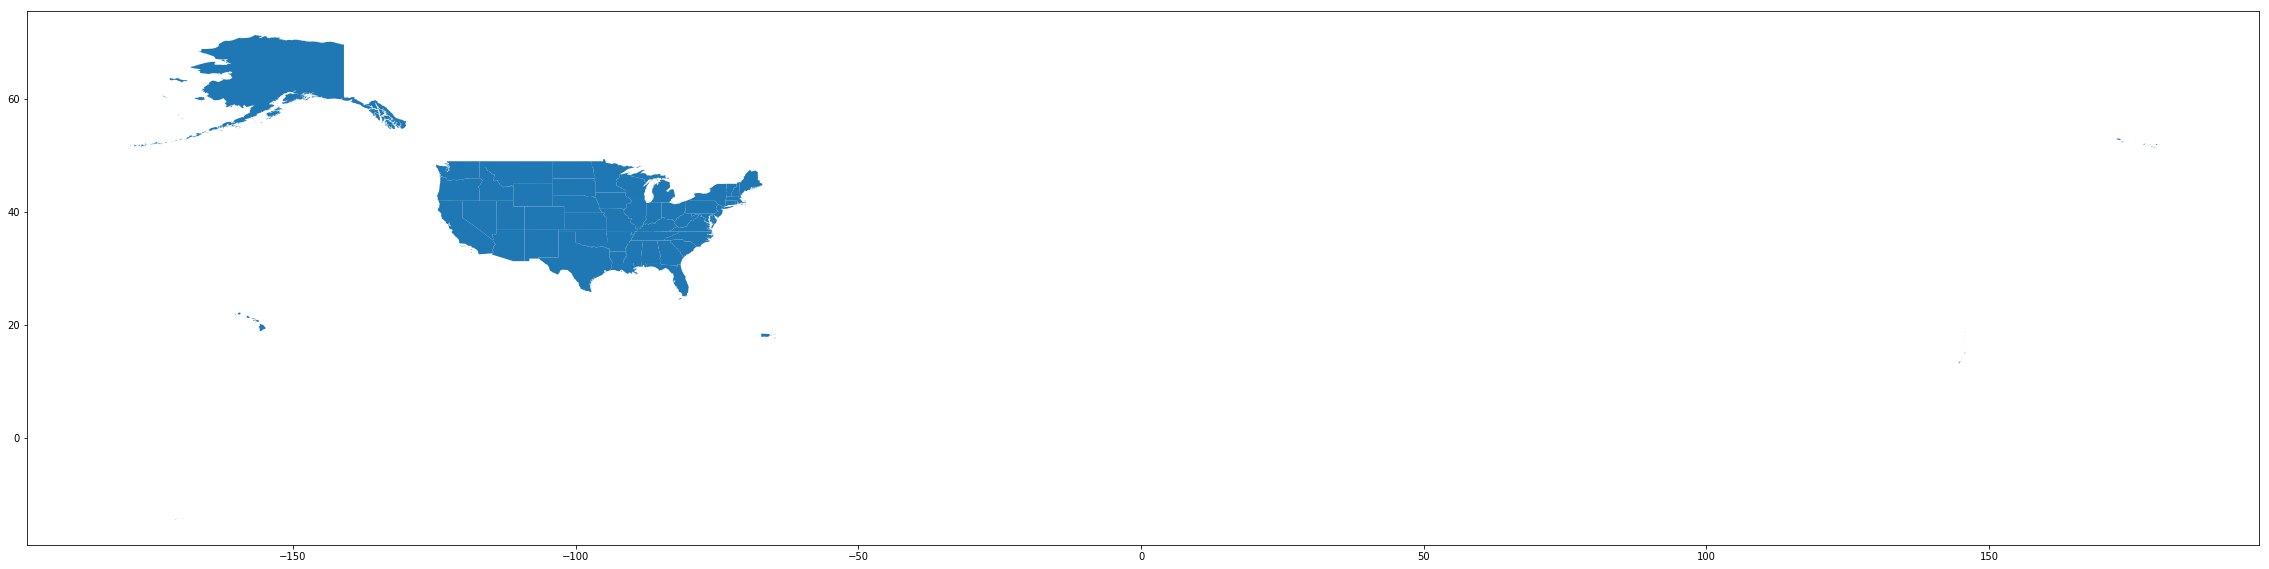

In [2]:
def get_us_multipolygon():
    """Return US multipolygon."""
    
    us = gpd.read_file('cb_2016_us_state_500k.shp')
    #print(us.crs)
    us = us.to_crs(epsg=4326)
    #print(us.crs)
    #display(us)
    us.plot(figsize=(40,20)) # plot multipolygon using geopandas
    return us.unary_union
    
us_multipoly = get_us_multipolygon()

In [4]:
# show map    
m = Map(center=[20, 210], zoom=2, layout=Layout(height='600px', align_self='stretch'))
m

Map(center=[20, 210], layers=(TileLayer(options=['attribution', 'detect_retina', 'max_zoom', 'min_zoom', 'opacity', 'tile_size']),), layout=Layout(align_self='stretch', height='600px'), options=['attribution_control', 'bounce_at_zoom_limits', 'box_zoom', 'center', 'close_popup_on_click', 'double_click_zoom', 'dragging', 'inertia', 'inertia_deceleration', 'inertia_max_speed', 'keyboard', 'keyboard_pan_offset', 'keyboard_zoom_offset', 'max_zoom', 'min_zoom', 'scroll_wheel_zoom', 'tap', 'tap_tolerance', 'touch_zoom', 'world_copy_jump', 'zoom', 'zoom_animation_threshold', 'zoom_control', 'zoom_start'], zoom=2)

In [5]:
# multipolygon style
us_style = {
    "color": "purple",
    "weight": 1,
}

def shift_polygon_lon(geojson):
    """Shift lon values to handle dateline wrapping issue."""
    
    for i, p in enumerate(geojson['coordinates']):
        pa = np.array(p)
        #print(pa.shape) 
        #print(pa)
        pa[:,np.where(pa[:,:,0] < 0),0] += 360.
        #print(pa)
        geojson['coordinates'][i] = pa.tolist()
    return geojson
    
    
# plot multipolygon
us_mp = shift_polygon_lon(us_multipoly.__geo_interface__)
l = GeoJSON(data=us_mp, style=us_style)
m.add_layer(l)

   ## Tidy dataset and extract new features

In [6]:
# define dict for discrete features
disc_map = {
    "basin": {
         0: "NA", # North Atlantic
         1: "SA", # South Atlantic
         2: "WP", # West Pacific
         3: "EP", # East Pacific
         4: "SP", # South Pacific
         5: "NI", # North Indian
         6: "SI", # South Indian
         7: "AS", # Arabian Sea
         8: "BB", # Bay of Bengal
         9: "EA", # Eastern Australia
        10: "WA", # Western Australia
        11: "CP", # Central Pacific
        12: "CS", # Carribbean Sea
        13: "GM", # Gulf of Mexico
        14: "MM", # Missing
    },
    "nature": {
        0: "TS",  # Tropical
        1: "SS",  # Subtropical
        2: "ET",  # Extratropical
        3: "DS",  # Disturbance
        4: "MX",  # Mix of conflicting reports
        5: "NR",  # Not Reported
        6: "MM",  # Missing
        7: "MM2", # Also Missing
    },
    "track_type": {
        0: "main",  # cyclogenesis to cyclolysis
        1: "merge", # cyclogenesis to merger
        2: "split", # split to cyclolysis
        3: "other", # split to merger
    },
    "month": {
        1: "Jan",
        2: "Feb",
        3: "Mar",
        4: "Apr",
        5: "May",
        6: "Jun",
        7: "Jul",
        8: "Aug",
        9: "Sep",
       10: "Oct",
       11: "Nov",
       12: "Dec",
    }
}


# conversion factors
kt_to_mph = 1.15078


def get_category(mph):
    """Return storm category from mph value of MSW."""
    if mph > 155.: return 5
    elif mph >= 131.: return 4
    elif mph >= 111.: return 3
    elif mph >= 96.: return 2
    elif mph >= 74.: return 1
    else: return 0
    
    
def intersects_us(tracks):
    """Return True if hurricane tracks touches US."""
    
    points = [Point(*pt) for pt in tracks]
    l = LineString(points)
    return l.intersects(us_multipoly)


def get_tidy_dataset(source_ds_file, tidy_ds_file):
    """Return tidy dataset as a data frame. Save tidy dataset
    as an HDF5 file for re-use without having to tidy again."""
    
    # open source file
    ds = NC.Dataset(source_ds_file)
    
    # extract features from each hurricane and save into a list of dicts
    data = []
    landfall_count = 0
    
    # compile regular expression for matching unnamed storms
    unnamed_re = re.compile(r'(UNNAMED|NOT NAMED)')
    
    for i in range(ds.dimensions['storm'].size):
        
        # get number of observations
        obs = ds.variables['numObs'][i]
        if obs <= 2: continue # skip if there are 2 or less observations
        
        # get storm id (storm names can be re-used so we need to track them uniquely)
        id = np.array_str(NC.chartostring(ds.variables['storm_sn'][i,:]))[2:-1]
        
        # extract filterable features first
        name = np.array_str(NC.chartostring(ds.variables['name'][i,:]))[2:-1]
        season = ds.variables['season'][i]
        genesis_basin = ds.variables['genesis_basin'][i]
        
        # extract the landfall feature: if at any time in the storm's track
        # makes landfall, then the feature landfall == True; otherwise it
        # will be landfall == False
        landfall = (ds.variables['landfall'][i,:obs-1] == 0).any()
        
        # get max MSW (maximum sustained wind) for the storm and its category
        wind_wmo = ds.variables['wind_wmo'][i,:obs-1] * kt_to_mph # convert kt to mph
        max_msw_idx = wind_wmo.argmax()
        max_msw = wind_wmo[max_msw_idx]
        max_cat = get_category(max_msw)
        
        # get max MSW (maximum sustained wind) for the storm over land if reached landfall
        # and its max category; determine the summary_idx which will be used to summarize
        # the hurricane as a single data record
        masked_msw = np.ma.masked_where(ds.variables['landfall'][i,:obs-1] != 0.0, wind_wmo)
        masked_msw.set_fill_value(ds.variables['wind_wmo']._FillValue)
        max_land_msw_idx = masked_msw.argmax()
        if landfall:
            max_land_msw = wind_wmo[max_land_msw_idx]
            summary_idx = max_land_msw_idx
        else:
            max_land_msw = 0.0
            summary_idx = max_msw_idx
        max_land_cat = get_category(max_land_msw)
            
        # extract other filterable features
        sub_basin = ds.variables['sub_basin'][i,:obs-1]
        nature = ds.variables['nature_wmo'][i,:obs-1]
        
        # skip records that have missing values in features
        if genesis_basin == 14:
            continue
        # skipping this filter; this filters out the east pacific storms
        #if sub_basin[summary_idx] == 14:
        #    continue
        if nature[summary_idx] in (4, 5, 6, 7):
            continue
            
        # skip records with unnamed storms
        #if unnamed_re.search(name): continue
        
        # extract the rest of the features
        time_wmo = ds.variables['time_wmo'][i,:obs-1]
        time_iso = Time(time_wmo, format='mjd', scale='utc')
        
        # including the time feature as-is (absolute value) from the source doesn't make 
        # sense for prediction; a better feature to derive from the time feature is the 
        # month of year since this can give the algorithm insight into seasonal effects
        month = time_iso[summary_idx].datetime.month
        
        # extract lon and handle wrapping issue
        lon = ds.variables['lon_wmo'][i,:obs-1]
            
        # extract other features
        lat = ds.variables['lat_wmo'][i,:obs-1]
        dist2land = ds.variables['dist2land'][i,:obs-1]
        msw = ds.variables['wind_wmo'][i,:obs-1]
        mcp = ds.variables['pres_wmo'][i,:obs-1]
        tt = ds.variables['track_type'][i]
        
        # touches US
        hit_us = intersects_us(zip(lon, lat)) if landfall else False
        
        # create GeoJSON of storm track
        ls = { 
            "type": "LineString",
            "coordinates": np.dstack((lon, lat))[0].tolist(),
        }
        
        # create feature for leaflet display;
        # stuff features into a message info for on_hover display
        msg = "{} {} {} {} {} {} {} {} {} {} {} {} {}".format(i, name, obs, genesis_basin, sub_basin[summary_idx],
                                                              time_iso[summary_idx].iso, lon[summary_idx], 
                                                              lat[summary_idx], dist2land[summary_idx],
                                                              msw[summary_idx], mcp[summary_idx], 
                                                              nature[summary_idx], tt, landfall)
        ls_feature = { 
            "type": "Feature",
            "properties": { "msg": msg },
            "geometry": ls,
        }
        
        # create data dict
        data.append({
            "id": id,
            "name": name,
            "genesis_basin": disc_map['basin'][genesis_basin],
            "sub_basin": disc_map['basin'][sub_basin[summary_idx]],
            "season": season,
            "time": time_wmo[summary_idx],
            "month": disc_map['month'][month],
            "lon": lon[summary_idx],
            "lat": lat[summary_idx],
            "dist2land": dist2land[summary_idx],
            "msw": msw[summary_idx],
            "mcp": mcp[summary_idx],
            "nature": disc_map['nature'][nature[summary_idx]],
            "track_type": disc_map['track_type'][tt],
            "landfall": landfall,
            "feature": json.dumps(ls_feature),
            "max_msw_mph": max_msw,
            "max_cat": max_cat,
            "max_land_msw_mph": max_land_msw,
            "max_land_cat": max_land_cat,
            "hit_us": hit_us,
        })
        
        # tally landfall
        if landfall: landfall_count += 1
            
    # create data frame
    df = pd.DataFrame(data)
    
    # save data frame to HDF5
    df.to_hdf(tidy_ds_file, "tropicalstorms", format="table", complib="zlib", complevel=9)
    
    # return data frame
    return df

# tidy data file
tidy_ds_file = "Allstorms.ibtracs_wmo.v03r10-tidy.h5"

# get tidy dataframe
if os.path.exists(tidy_ds_file):
    df = pd.read_hdf(tidy_ds_file)
else:
    df = get_tidy_dataset(source_file, tidy_ds_file)

# print info
display(Markdown("### landfall distribution of tidy dataset"))
display(Markdown("* total storms: {}".format(len(df))))
display(Markdown("* total storms with variable landfall == True: {}".format(len(df[df['landfall'] == True]))))
display(Markdown("* total storms with variable landfall == False: {}".format(len(df[df['landfall'] == False]))))

### landfall distribution of tidy dataset

* total storms: 4657

* total storms with variable landfall == True: 2033

* total storms with variable landfall == False: 2624

## let's display the US landfall hurricanes in table format

In [7]:
df_hit_us = df.loc[df['hit_us'] == True]
display(df_hit_us[['id', 'name', 'season',  'month', 
                   'lon', 'lat', 'nature', 'track_type', 
                   'max_msw_mph', 'max_cat', 
                   'max_land_msw_mph', 'max_land_cat']])

,id,name,season,month,lon,lat,nature,track_type,max_msw_mph,max_cat,max_land_msw_mph,max_land_cat
0,51175N2627,NAME,1851,Jun,-96.500000,28.099998,TS,main,92.062393,1,92.062393,1
1,51228N1331,NAME,1851,Aug,-86.099998,29.599998,TS,main,115.077995,3,115.077995,3
4,52232N2129,NAME,1852,Aug,-88.599998,30.199999,TS,main,115.077995,3,115.077995,3
5,52247N1430,NAME,1852,Sep,-83.400002,27.900000,TS,main,80.554596,1,80.554596,1
6,52249N1729,NAME,1852,Sep,-66.099998,17.699999,TS,main,80.554596,1,80.554596,1
8,52278N1429,NAME,1852,Oct,-84.900002,29.199999,TS,main,103.570198,2,103.570198,2
14,54176N2626,NAME,1854,Jun,-97.000000,26.199999,TS,main,80.554596,1,80.554596,1
15,54246N2530,NAME,1854,Sep,-81.099998,31.699999,TS,main,126.585793,3,115.077995,3
16,54261N2826,NAME,1854,Sep,-95.299995,28.900000,TS,main,103.570198,2,103.570198,2
20,55252N2027,NAME,1855,Sep,-89.500000,29.199999,TS,main,126.585793,3,126.585793,3


# Analysis of hurricanes that made US landfall

## Visualize storm tracks on map

In [19]:
# set styles
landfall_style = {
    "color": "blue",
    "weight": 1,
}
nolandfall_style = {
    "color": "yellow",
    "weight": 1,
}
hover_style = {
    "weight": 5,
}

# hover handler
def hover_handler(event=None, id=None, properties=None):
    sys.stdout.write("\r" + properties['msg'])
    sys.stdout.flush()

In [26]:
# show map    
m = Map(center=[40, 0], zoom=2, layout=Layout(height='600px', align_self='stretch'))
m

Map(center=[40, 0], layers=(TileLayer(options=['attribution', 'detect_retina', 'max_zoom', 'min_zoom', 'opacity', 'tile_size']),), layout=Layout(align_self='stretch', height='600px'), options=['attribution_control', 'bounce_at_zoom_limits', 'box_zoom', 'center', 'close_popup_on_click', 'double_click_zoom', 'dragging', 'inertia', 'inertia_deceleration', 'inertia_max_speed', 'keyboard', 'keyboard_pan_offset', 'keyboard_zoom_offset', 'max_zoom', 'min_zoom', 'scroll_wheel_zoom', 'tap', 'tap_tolerance', 'touch_zoom', 'world_copy_jump', 'zoom', 'zoom_animation_threshold', 'zoom_control', 'zoom_start'], zoom=2)

In [27]:
# plot multipolygon
l = GeoJSON(data=us_multipoly.__geo_interface__, style=us_style)
m.add_layer(l)


def shift_linestring_lon(geojson):
    """Shift lon values to handle dateline wrapping issue."""
    
    ls_a = np.array(geojson['coordinates'])
    lon = ls_a[:,0]
    lon_diff = lon[0] - lon[-1]
    if lon_diff > 180.:
        ls_a[np.where(lon > 0), 0] -= 360.
    elif lon_diff < -180.:
        ls_a[np.where(lon < 0), 0] += 360.
    geojson['coordinates'] = ls_a.tolist()
    return geojson


# add storms that made landfall on US soil
for i, r in df_hit_us.iterrows():
    ls_feature = json.loads(r.feature)
    ls_feature['geometry'] = shift_linestring_lon(ls_feature['geometry'])
    l = GeoJSON(data=ls_feature, style=landfall_style, hover_style=hover_style)
    l.on_hover(hover_handler)
    m.add_layer(l)

## Histogram 

#### min season: 1851

#### max season: 2016

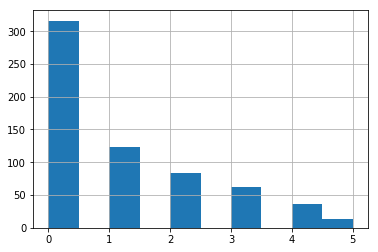

In [36]:
display(Markdown("#### min season: {}".format(df_hit_us['season'].min())))
display(Markdown("#### max season: {}".format(df_hit_us['season'].max())))
df_hit_us['max_land_cat'].hist()